In [1]:
import draw2Svg as dw

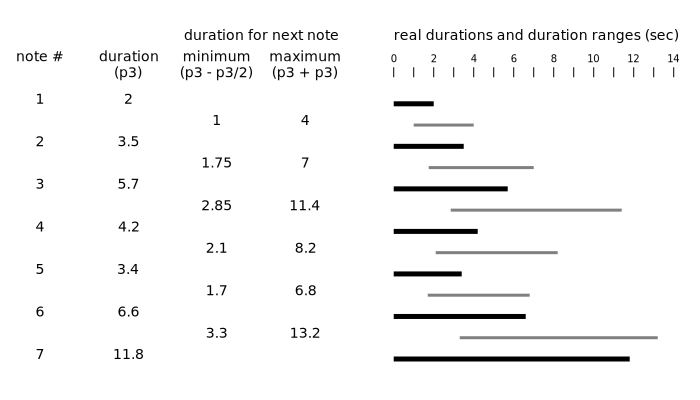

In [54]:
wdth,hght = 700,400
d = dw.Drawing(wdth,hght)

def grid(num,length=800,margin_1=40,margin_2=41):
    """returns a list of num grid values between
    margin_1 and height-margin_2 which are subtracted from length.
    for horizontal, it counts from left to right
    for vertical, it counts from top to bottom"""
    real_length = length - margin_1 - margin_2
    grid_step = real_length / (num-1)
    return [i*grid_step+margin_1 for i in range(num)]

x_grid = grid(8,wdth)
x_grid_wdth = x_grid[1] - x_grid[0]
y_grid = grid(16,hght)
y_grid_hght = y_grid[1] - y_grid[0]

textsize = 14

# text left
txt_tl = ['note #','1','2','3','4','5','6','7']
for i in range(8):
    d.append(dw.Text(txt_tl[i],textsize,x_grid[0],y_grid[2*i+1],text_anchor='middle'))
# text top
d.append(dw.Text('duration for next note',textsize,x_grid[2]+x_grid_wdth/2,y_grid[0],text_anchor='middle'))
d.append(dw.Text('duration',textsize,x_grid[1],y_grid[1],text_anchor='middle'))
d.append(dw.Text('(p3)',textsize,x_grid[1],y_grid[1]+16,text_anchor='middle'))
d.append(dw.Text('minimum',textsize,x_grid[2],y_grid[1],text_anchor='middle'))
d.append(dw.Text('(p3 - p3/2)',textsize,x_grid[2],y_grid[1]+16,text_anchor='middle'))
d.append(dw.Text('maximum',textsize,x_grid[3],y_grid[1],text_anchor='middle'))
d.append(dw.Text('(p3 + p3)',textsize,x_grid[3],y_grid[1]+16,text_anchor='middle'))

durs = [2,3.5,5.7,4.2,3.4,6.6,11.8]
mins = [1,1.75,2.85,2.1,1.7,3.3]
maxs = [4,7,11.4,8.2,6.8,13.2]
scal = 20
for i,dur in enumerate(durs):
    y = y_grid[2*i+3]
    d.append(dw.Text(str(dur),textsize,x_grid[1],y,text_anchor='middle'))
    d.append(dw.Line(x_grid[4],y,x_grid[4]+dur*scal,y,stroke='black',stroke_width=5))

for i in range(6):
    y = y_grid[2*i+4]
    min = mins[i]
    max = maxs[i]
    d.append(dw.Text(str(min),textsize,x_grid[2],y,text_anchor='middle'))
    d.append(dw.Text(str(max),textsize,x_grid[3],y,text_anchor='middle'))
    d.append(dw.Line(x_grid[4]+min*scal,y,x_grid[4]+max*scal,y,stroke='gray',stroke_width=3))
    #print(x_grid[4]+max*scal)

# scaling on top
tick = dw.Path(stroke='black')
tick.M(0,0)
tick.V(-10)
for i in range(15):
    x = x_grid[4]+i*scal
    y = y_grid[1]+16
    d.append(dw.Use(tick,x,y))
    if i%2==0: d.append(dw.Text(str(i),10,x,y-15,text_anchor='middle'))
d.append(dw.Text('real durations and duration ranges (sec)',
                 textsize,x_grid[4],y_grid[0]))

#d.setPixelScale(1.5)
d.savePng('../../images/01-GS-10-a.png')
d